## Impor Modul

In [34]:
import processor
import numpy as np
import matplotlib.pyplot as plt

In [35]:
berkas = ['IMDb_movies.csv', 'IMDb_ratings.csv']
movies = {}
for isi in berkas:
    movies[isi] = processor.read_data(isi, sep=',')
movies

{'IMDb_movies.csv':       imdb_title_id                                              title  \
 0         tt0000574                        The Story of the Kelly Gang   
 1         tt0001892                                     Den sorte drøm   
 2         tt0002101                                          Cleopatra   
 3         tt0002130                                          L'Inferno   
 4         tt0002199  From the Manger to the Cross; or, Jesus of Naz...   
 ...             ...                                                ...   
 81268     tt9903716                                             Jessie   
 81269     tt9905412                                              Ottam   
 81270     tt9905462                                          Pengalila   
 81271     tt9911774                          Padmavyuhathile Abhimanyu   
 81272     tt9914286                                  Sokagin Çocuklari   
 
                                           original_title  year date_published 

In [36]:
data_movies = movies['IMDb_movies.csv']
data_movies

imdb_title_id                                              title  \
0         tt0000574                        The Story of the Kelly Gang   
1         tt0001892                                     Den sorte drøm   
2         tt0002101                                          Cleopatra   
3         tt0002130                                          L'Inferno   
4         tt0002199  From the Manger to the Cross; or, Jesus of Naz...   
...             ...                                                ...   
81268     tt9903716                                             Jessie   
81269     tt9905412                                              Ottam   
81270     tt9905462                                          Pengalila   
81271     tt9911774                          Padmavyuhathile Abhimanyu   
81272     tt9914286                                  Sokagin Çocuklari   

                                          original_title  year date_published  \
0                            The Story of the Kelly Gang  1906     1906-12-26   
1                                         Den sorte drøm  1911     1911-08-19   
2                                              Cleopatra  1912     1912-11-13   
3                                              L'Inferno  1911     1911-03-06   
4      From the Manger to the Cross; or, Jesus of Naz...  1912           1913   
...                                                  ...   ...            ...   
81268                                             Jessie  2019     2019-03-15   
81269                                              Ottam  2019     2019-03-08   
81270                                          Pengalila  2019     2019-03-08   
81271                          Padmavyuhathile Abhimanyu  2019     2019-03-08   
81272                                  Sokagin Çocuklari  2019     2019-03-15   

                           genre  duration           country   language  \
0        Biography, Crime, Drama        70         Australia        NaN   
1                          Drama        53  Germany, Denmark        NaN   
2                 Drama, History       100               USA    English   
3      Adventure, Drama, Fantasy        68             Italy    Italian   
4               Biography, Drama        60               USA    English   
...                          ...       ...               ...        ...   
81268           Horror, Thriller       106             India     Telugu   
81269                      Drama       120             India  Malayalam   
81270                      Drama       111             India  Malayalam   
81271                      Drama       130             India  Malayalam   
81272              Drama, Family        98            Turkey    Turkish   

                                  director  ...  \
0                             Charles Tait  ...   
1                                Urban Gad  ...   
2                       Charles L. Gaskill  ...   
3      Francesco Bertolini, Adolfo Padovan  ...   
4                            Sidney Olcott  ...   
...                                    ...  ...   
81268                      Aswani Kumar V.  ...   
81269                                  Zam  ...   
81270                        T.V. Chandran  ...   
81271                      Vineesh Aaradya  ...   
81272                    Ahmet Faik Akinci  ...   

                                                  actors  \
0      Elizabeth Tait, John Tait, Norman Campbell, Be...   
1      Asta Nielsen, Valdemar Psilander, Gunnar Helse...   
2      Helen Gardner, Pearl Sindelar, Miss Fielding, ...   
3      Salvatore Papa, Arturo Pirovano, Giuseppe de L...   
4      R. Henderson Bland, Percy Dyer, Gene Gauntier,...   
...                                                  ...   
81268  Sritha Chandana, Pavani Gangireddy, Abhinav Go...   
81269  Nandu Anand, Roshan Ullas, Manikandan R. Achar...   
81270  Lal, Akshara Kishor, Iniya, Narain, Renji Pani...   
81271  Anoop Chandran, Indrans

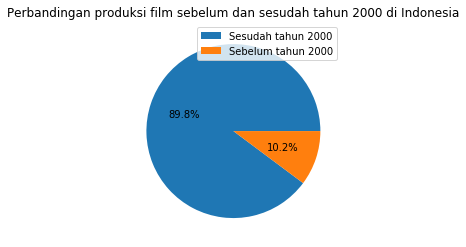

<Figure size 432x288 with 0 Axes>

In [37]:
film_indo = data_movies[data_movies['country'] == 'Indonesia']
A = film_indo[film_indo['year'] >= 2000]
B = film_indo[film_indo['year'] < 2000]
values = [A.shape[0], B.shape[0]]
labels = ['Sesudah tahun 2000', 'Sebelum tahun 2000']
processor.generate_pie(values, labels, 'Perbandingan produksi film sebelum dan sesudah tahun 2000 di Indonesia')

In [38]:
y = data_movies.dropna(subset=['budget'])
negara = ['Indonesia', 'Philippines', 'Singapore', 'Malaysia', 'Vietnam', 'Thailand']
biaya = []
for isi in negara:
    budget = list(y[y['country'] == isi]['budget'])
    total = 0
    for comp in budget:
        comp = comp.split()
        konversi = {'$':float(comp[1])*14100,'PHP':float(comp[1])*280.6901,'SGD':float(comp[1])*10102.9437,'MYR':float(comp[1])*3290.7746,'VND':float(comp[1])*0.6056,'THB':float          (comp[1])*453.169,'EUR':float(comp[1])*15607,'IDR':float(comp[1])*1}      # Data diperoleh pada 19 Juni 2020 pukul 10.19 WIB
        new_budget = konversi[comp[0]]
        total += float(new_budget)
    biaya.append(total)
print(biaya)

[550767009297.0, 264263044499.99997, 378924250410.0, 435713390999.5, 211148400000.0, 2170883506900.0]


In [39]:
votes = data_movies.dropna(subset=['votes'])
total_votes = []
for isi in negara:
    total_votes.append(np.sum(votes[votes['country']==isi]['votes']))
print(total_votes)

[111574, 74109, 15680, 20754, 15188, 343721]


In [40]:
genre = data_movies.dropna(subset=['genre'])
j = []
for isi in negara:
    total = 0
    for value in list(genre[genre['country'] == isi]['genre']):
        if value.find('Horror') != -1:
            total += 1
    j.append(total)
print(j)

[35, 24, 6, 10, 4, 73]


In [41]:
k = []
for isi in negara:
    durasi = list(data_movies[data_movies['country']==isi]['duration'])
    for value in durasi:
        k.append(value)

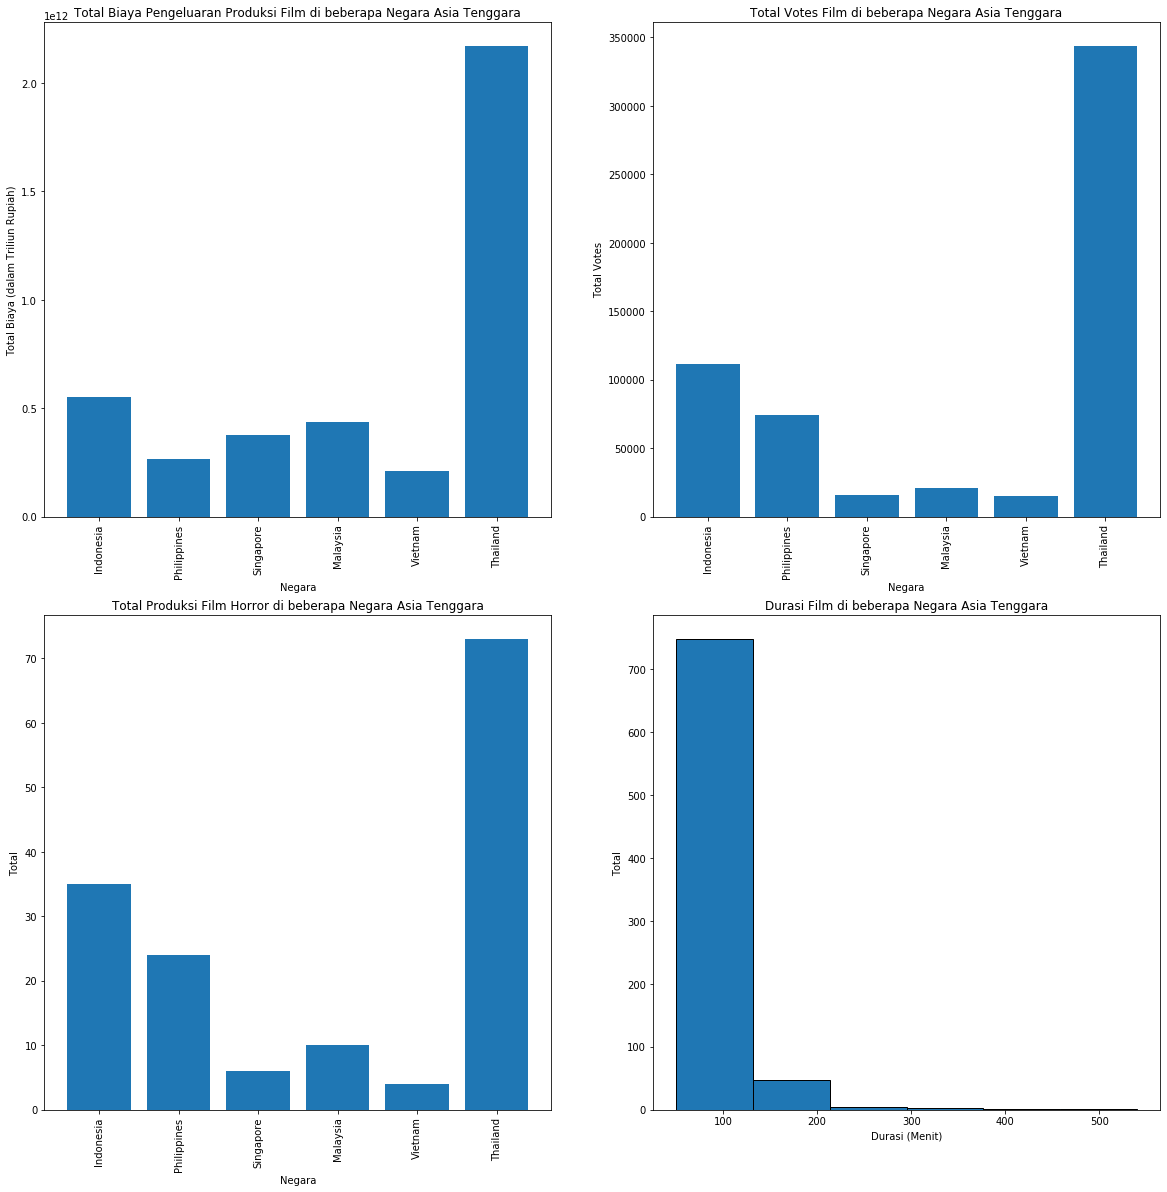

<Figure size 432x288 with 0 Axes>

In [42]:
fig, ax = plt.subplots(2,2, figsize=(20,20))
processor.generate_bar_sub(negara,biaya,'Total Biaya Pengeluaran Produksi Film di beberapa Negara Asia Tenggara', 'Negara', 'Total Biaya (dalam Triliun Rupiah)',ax[0,0])
processor.generate_bar_sub(negara,total_votes,'Total Votes Film di beberapa Negara Asia Tenggara', 'Negara', 'Total Votes', ax[0,1])
processor.generate_bar_sub(negara,j,'Total Produksi Film Horror di beberapa Negara Asia Tenggara', 'Negara', 'Total', ax[1,0])
processor.generate_hist_sub(k,'Durasi Film di beberapa Negara Asia Tenggara', 6, 'Durasi (Menit)', 'Total', ax[1,1])
plt.show()
plt.clf()

In [50]:
g = data_movies[['title','country']].groupby('country').count().sort_values(by=['title'],ascending=False).head(10)
g

title
country         
USA        27490
India       5540
UK          3869
France      2975
Japan       2850
Italy       2282
Canada      1707
Germany     1341
Turkey      1217
Hong Kong   1211

In [56]:
reviews_film = []
for i in g.index:
    u = data_movies[data_movies['country']==i].dropna(subset=['reviews_from_users'])
    reviews_film.append(np.average(u['reviews_from_users']))
reviews_film

[61.40373378413142,
 20.66221765913758,
 31.35981186307813,
 11.808073394495413,
 15.968080965356169,
 13.089813800657174,
 19.901477832512317,
 10.949111470113086,
 6.048062015503876,
 10.369602763385148]

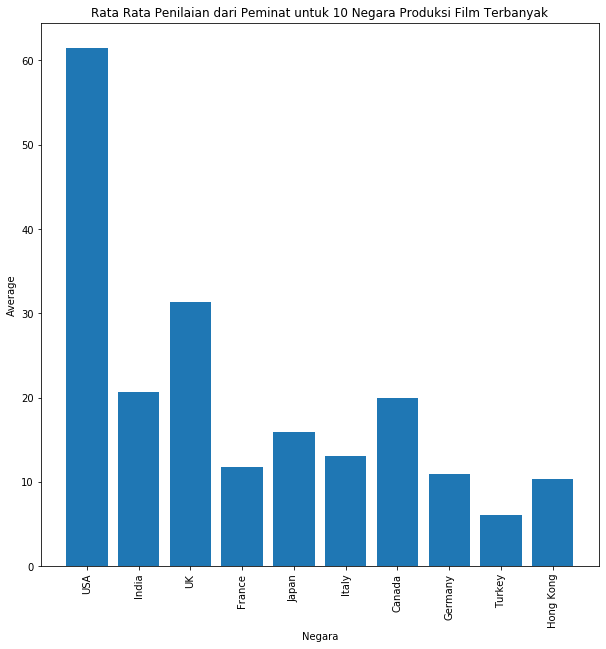

<Figure size 432x288 with 0 Axes>

In [59]:
plt.figure(figsize=(10,10))
processor.generate_bar(g.index, reviews_film, 'Rata Rata Penilaian dari Peminat untuk 10 Negara Produksi Film Terbanyak', 'Negara','Average')

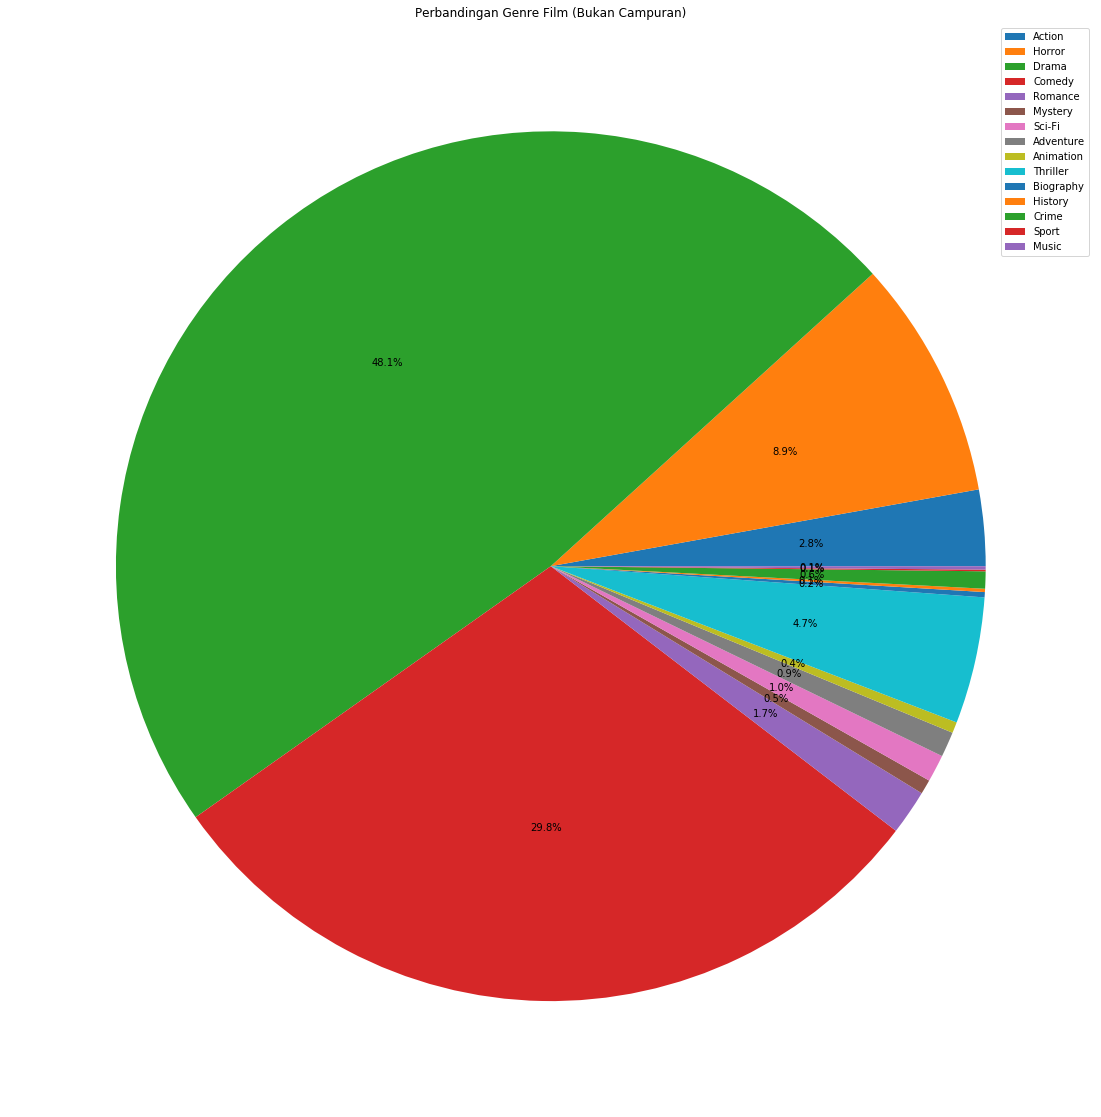

<Figure size 432x288 with 0 Axes>

In [90]:
h = data_movies[['title','genre']].groupby('genre').count()
values = [h.loc['Action'][0],h.loc['Horror'][0],h.loc['Drama'][0],h.loc['Comedy'][0],h.loc['Romance'][0],h.loc['Mystery'][0],h.loc['Sci-Fi'][0],h.loc['Adventure'][0],h.loc['Animation'][0],h.loc['Thriller'][0],h.loc['Biography'][0],h.loc['History'][0],h.loc['Crime'][0],h.loc['Sport'][0],h.loc['Music'][0]]
labels = ['Action','Horror','Drama','Comedy','Romance','Mystery','Sci-Fi','Adventure','Animation','Thriller','Biography','History','Crime','Sport','Music']
plt.figure(figsize=(20,20))
processor.generate_pie(values, labels, 'Perbandingan Genre Film (Bukan Campuran)')